In [3]:
# making seismic cross sections
import numpy as np
import matplotlib.pyplot as plt

## final project intermediate step: **seismic cross section**

In [6]:
def seismic_cross_section(interfaces,velocities,filename):
    ########## FUNCTION DETAILS: PLEASE READ #################################################################################
    # interfaces = array of interface depths as positive values, [meters]                                                    #
    # velocities = list of strings of layer P wave velocities, [m/s]                                                         #
    # filename   = filename to save the plot as a string, ex: 'my-seismic-cross-section.png'                                 #
    # ^^^^^^^^^^^^^^^^^^^^^ PLEASE READ AND RESPECT THE TYPES OF INPUTS (OR YOU WILL HAVE TERRIBLE ERRORS) ^^^^^^^^^^^^^^^^^ #
    ##########################################################################################################################
    
    # check the lengths of velocities (list) and interface depths (array) please:
    if len(velocities)==len(interfaces)+1:
        print('Making the plot now...')
    else:
        print("I can't plot this! Fix length of array and/or list to match: len(interface depths) = n, len(velocities) = n+1.")
        return None

    # Define the parameters
    distance   = np.linspace(0,50000,1000)    # x distance across the volcano [m]
    surface    = np.zeros_like(distance)      # surface vector
    basement   = surface - 10000              # lower bound for the plot
    receiver_x = np.linspace(0,50000,100)     # receiver spacing
    receiver_y = 100*np.ones_like(receiver_x) # you need a y vector to plot the x vector

    interfaces = np.abs(interfaces)           # in case you forget to make the interface depths POSITIVE, I fix it for you

    layers       = np.zeros([len(interfaces)+2,len(distance)]) # initializing layers for plotting by # of input interfaces
    layers[0,:]  = surface                                     # first layer starts at the surface
    layers[-1,:] = basement                                    # last layer ends with lower bound of plot
    for i in range(len(interfaces)):
        layers[i+1,:] = surface - interfaces[i]                # fill middle with the input interfaces (from YOU, dear reader)

    # colors for plotting the layers
    c_list = plt.cm.viridis_r(np.linspace(0,1,len(interfaces)+2))
    
    # now actually make the figure (don't worry about it):
    plt.figure(figsize=(15,6),dpi=300)
    for i in range(len(interfaces)+1):
        plt.fill_between(distance,layers[i,:],layers[i+1,:],where=layers[i,:]>layers[i+1,:],color=c_list[i],label=velocities[i])
    for i in range(1,len(interfaces)+1):
        plt.plot(distance,layers[i],color='black',linestyle='--')
    plt.plot(distance,surface,color='black')
    plt.plot(25000*np.ones(250), np.linspace(1000,-10001,250),linestyle=':',linewidth=3,color='white',alpha=0.8) # x coord of peak
    plt.scatter(25000,270,marker='^',s=280,color='brown')         # tiny 'volcano' peak 
    plt.scatter(receiver_x,receiver_y,marker='^', color='black')  # receivers
    plt.ylim(-10000,1000)
    plt.xlim(0,50000)
    plt.xlabel('Distance [m]',fontsize=14)
    plt.ylabel('Depth [m]',fontsize=14)
    plt.legend(fontsize=12)
    plt.savefig(filename, bbox_inches='tight')
    plt.show();

## Example plot (and function use example):

In [13]:
# define array of interface depths:
int_default = np.array([305, 2186, 4995, 8066]) # interface depths in meters

# define list of velocities (include units):
vel_default =  ['v1 = 2700 m/s', 'v2 = 3780 m/s', 'v3 = 4717 m/s', 'v4 = 5396 m/s', 'v5 = 6250 m/s']

##############################################################################################
#  NB: velocity list should be of length n+1, for n = length of array of interface depths,   #
#  and the plotting function will accommodate any length of interface array as long as the   #
#  length of the velocity list follows the rule above. :)                                    #
##############################################################################################

# check that you are following the rule above:
print('length of array of interface depths = ', len(int_default), " = n")
print('length of list of velocities        = ', len(vel_default), " = n+1")

length of array of interface depths =  4  = n
length of list of velocities        =  5  = n+1


Making the plot now...


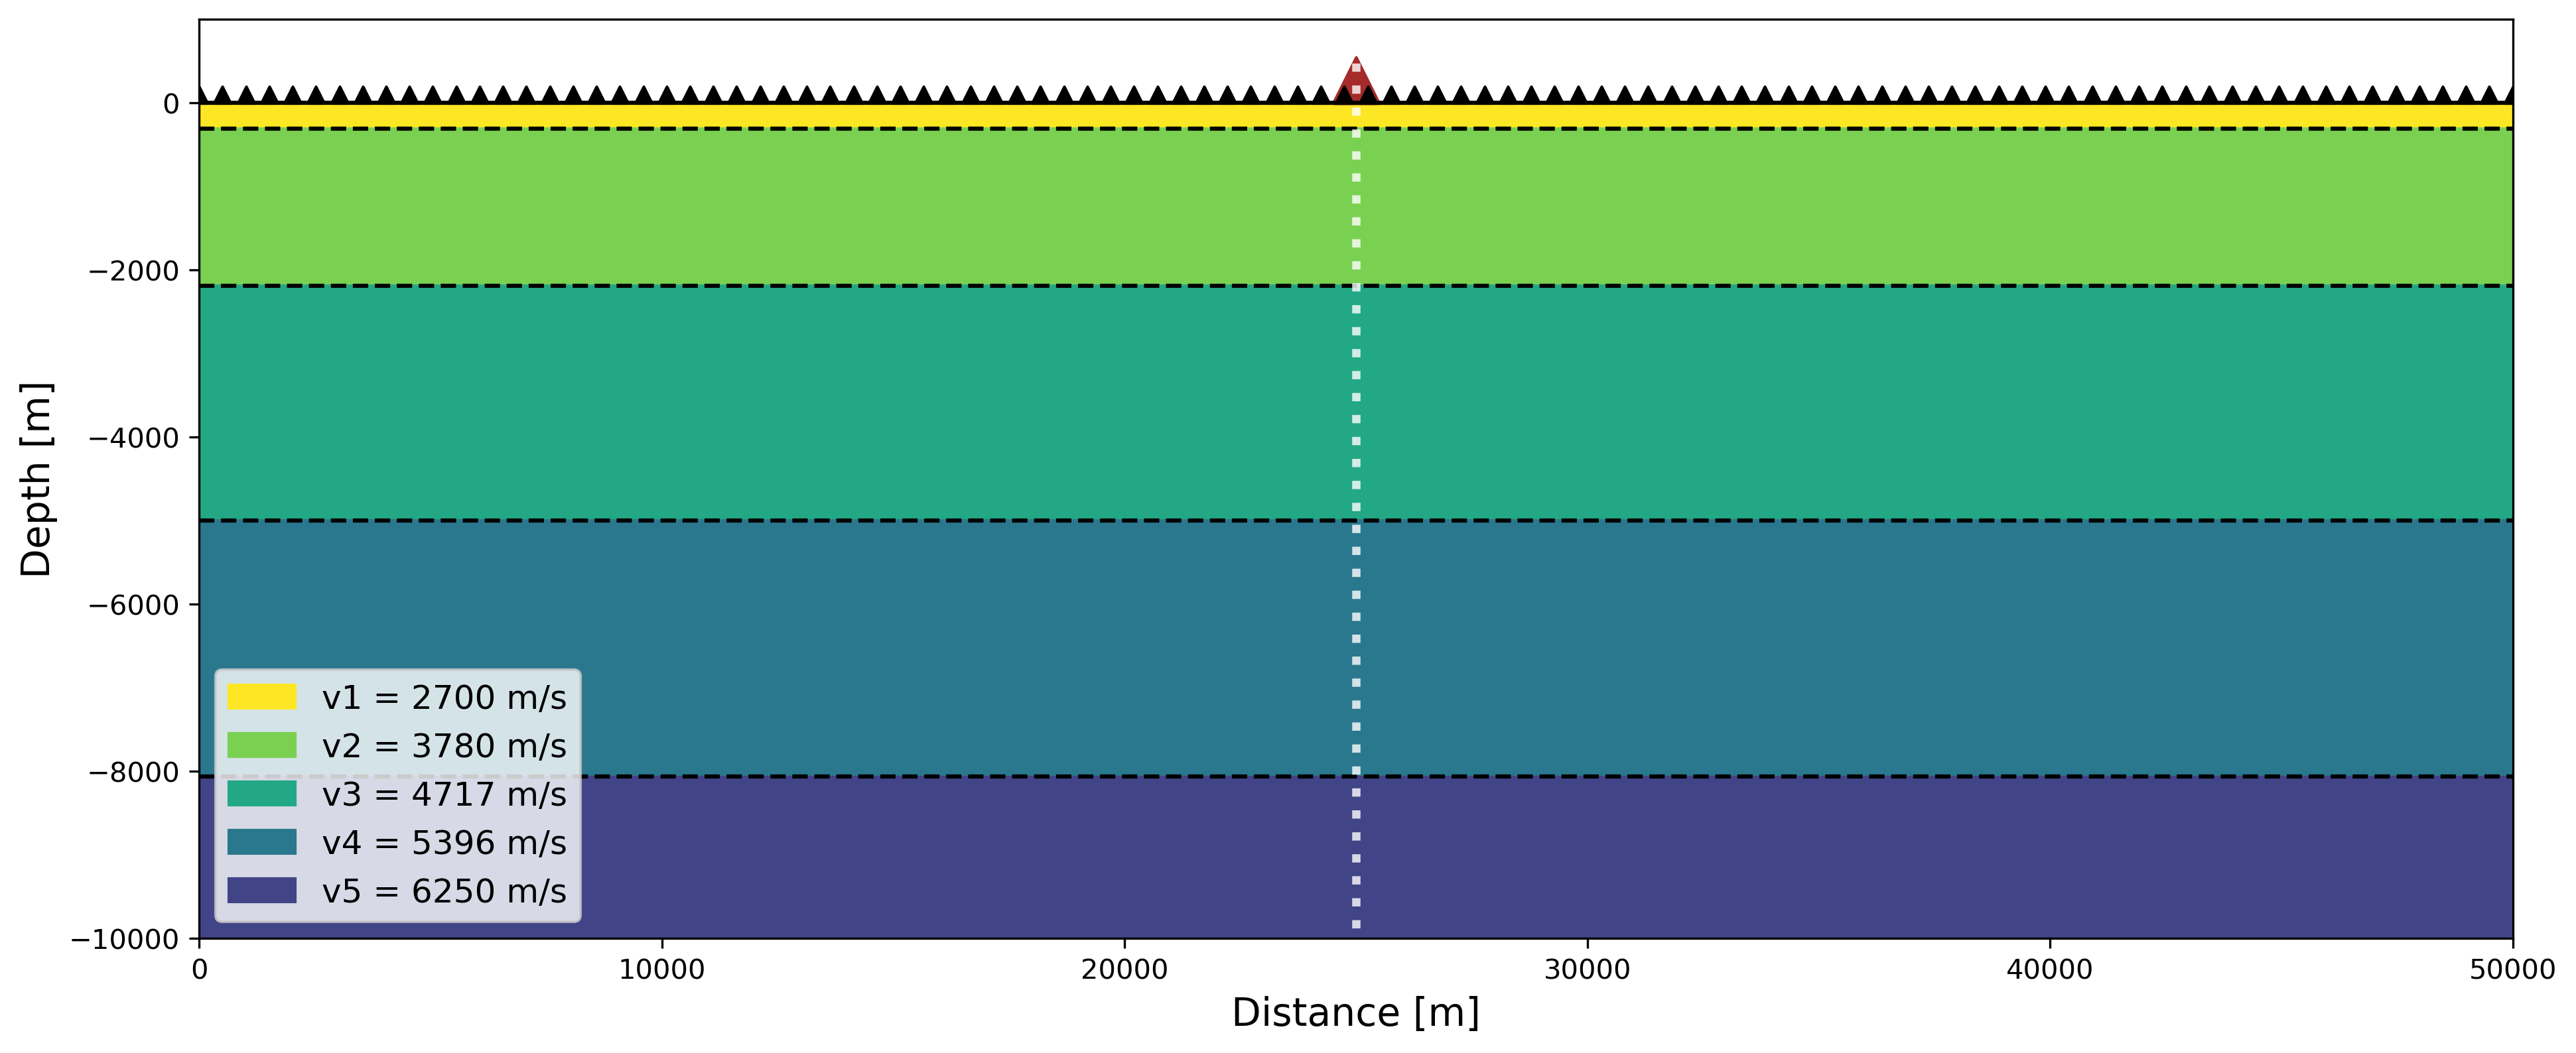

In [15]:
# actually make the plot:
default_plot = seismic_cross_section(int_default,vel_default,'default-cross-section.png')